# Case 1. Heart Disease Classification
Sanni Tolonen<br>
4.2.2018<br>
Cognitive Systems for Health Technology Applications, Spring 2018<br>
Helsinki Metropolia University of Applied Sciences

<h2>1. Objectives</h2><br>
The aim of this assignment is to learn to read data from externals sources using panda’s iofunctions<br>
and use keras.io dense neural networks to make an expert system to support in
diagnostic decision making.


<h2> 2. Required libraries </h2>

In [126]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import models
from keras import layers

In [127]:
# check the versions

print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('sklearn:', sk.__version__)
print('keras:', keras.__version__)

numpy: 1.12.1
pandas: 0.22.0
sklearn: 0.19.1
keras: 2.1.2


<h2> 3. Data description and preprocessing </h2>

Starting with the processed data.The data was collected from the Cleveland Clinic Foundation. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).<br>The 14 used attributes are:
1. age: age in years      
2. sex: sex (1 = male; 0 = female)      
3. cp: chest pain type
        Value 1: typical angina
        Value 2: atypical angina
        Value 3: non-anginal pain
        Value 4: asymptomatic        
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl      
6. fbs: fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)       
7. restecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                 elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy
                 by Estes' criteria   
8. thalach: maximum heart rate achieved   
9. exang: exercise induced angina (1 = yes; 0 = no)    
10. oldpeak: ST depression induced by exercise relative to rest   
11. slope: the slope of the peak exercise ST segment
        Value 1: upsloping
        Value 2: flat
        Value 3: downsloping     
12. ca: number of major vessels (0-3) colored by flourosopy       
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect      
14. num: diagnosis of heart disease (angiographic disease status)
        Value 0: < 50% diameter narrowing
        Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
        
Number of instances in this database is 303. Missing Attribute Values are distinguished with value -9.0.<br>
Under here you can see the first ten lines of the database.

In [128]:
# location of the dataset

filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

# column names for the data

colnames = ["age", "sex", "cp", "trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

# read the data to data frame

df = pd.read_csv(filename,
                names=colnames,
                na_values='?')

# print the first ten lines of the data

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


Under here you can see the descriptive statistics of the data.

In [129]:
# calculate descriptive statistics

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [130]:
# check how many missing values are in each column

np.sum(np.isnan(df))

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [131]:
# replace the missing values with column mean values

df = df.where(~np.isnan(df), df.mean(), axis='columns')

Under here you can see the minimum values of the database.

In [132]:
# print all the minimum values of the data

df.min()

age          29.0
sex           0.0
cp            1.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          3.0
num           0.0
dtype: float64

And under here you can see the maximum values of the database.

In [133]:
# print all the maximum values of the data

df.max()

age          77.0
sex           1.0
cp            4.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         3.0
ca            3.0
thal          7.0
num           4.0
dtype: float64

This is a boxplot made from the persons ages and its grouped by sex. O means female and 1 means male. The green line in the middle of the boxes is the mean of each group. As you can see, for females it's a little over 55 years old and for males it's about 55 years old.

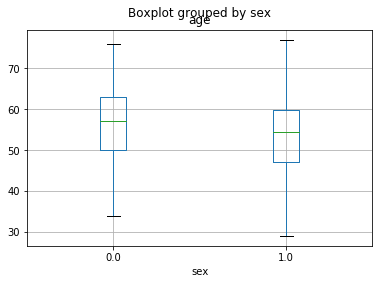

In [134]:
# create a boxplot of the column age and group it by sex

df.boxplot(column='age', by='sex')
plt.show()

This is a histogram  made of resting blood pressure of the test subjects in mm/Hg. A histogram is a plot tha shows the underlying frequency distribution of a set of continuous data. From this histogram it you can see that the highest count of the blood pressure is approximately aroun 130 mm/Hg.

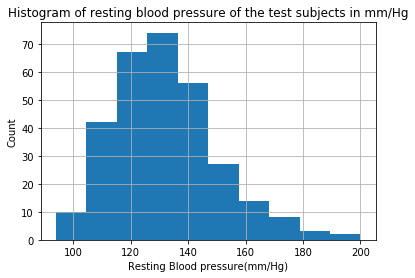

In [135]:
# create a histogram of the resting bloodpressure

df['trestbps'].hist(bins=10)
plt.title('Histogram of resting blood pressure of the test subjects in mm/Hg')
plt.xlabel('Resting Blood pressure(mm/Hg)')
plt.ylabel('Count')
plt.show()

<h2> 4. Modeling and compilation </h2>

In [136]:
# calculate the labels:
# 0 = healthy, 1 = disease
labels = (df['num'] > 0).values

In [137]:
# select the columns for training

columns = ['age', 'sex', 'cp', 'trestbps', 
           'chol', 'fbs', 'restecg', 'thalach', 
           'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

# convert into numerical array (np.array)

data = df[columns].values

In [138]:
# check the number of samples and attributes

data.shape

(303, 13)

In [139]:
# scale the data

min_max_scaler = preprocessing.MinMaxScaler()
data_minmax = min_max_scaler.fit_transform(data)
data_minmax

array([[ 0.70833333,  1.        ,  0.        , ...,  1.        ,
         0.        ,  0.75      ],
       [ 0.79166667,  1.        ,  1.        , ...,  0.5       ,
         1.        ,  0.        ],
       [ 0.79166667,  1.        ,  1.        , ...,  0.5       ,
         0.66666667,  1.        ],
       ..., 
       [ 0.58333333,  1.        ,  1.        , ...,  0.5       ,
         0.33333333,  1.        ],
       [ 0.58333333,  0.        ,  0.33333333, ...,  0.5       ,
         0.33333333,  0.        ],
       [ 0.1875    ,  1.        ,  0.66666667, ...,  0.        ,
         0.22408027,  0.        ]])

In [140]:
# check the scaler values

min_max_scaler.scale_

array([ 0.02083333,  1.        ,  0.33333333,  0.00943396,  0.00228311,
        1.        ,  0.5       ,  0.00763359,  1.        ,  0.16129032,
        0.5       ,  0.33333333,  0.25      ])

In [141]:
# check the minimum values

min_max_scaler.min_

array([-0.60416667,  0.        , -0.33333333, -0.88679245, -0.28767123,
        0.        ,  0.        , -0.54198473,  0.        ,  0.        ,
       -0.5       ,  0.        , -0.75      ])

In [142]:
# calculate the mean values of the scaled dataset

data_minmax.mean(axis = 0)

array([ 0.529978  ,  0.67986799,  0.71947195,  0.35556386,  0.27555495,
        0.14851485,  0.4950495 ,  0.60005543,  0.32673267,  0.16767806,
        0.30033003,  0.22408027,  0.43355482])

In [143]:
# divide the data into train and test sets, leave 36% of the data to testset

x_train, x_test, y_train, y_test = train_test_split(
    data_minmax, labels, test_size=0.36)

# check the sizes of the variables

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((193, 13), (110, 13), (193,), (110,))

<h2> 5. Training and validation </h2>

In [144]:
# build and train the model.

model = []
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_dim = 13)) 
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

# N = number of epochs
N = 100
h = model.fit(x_train, y_train,
              epochs = N,
              batch_size = 128,
              validation_data=(x_test, y_test))

Train on 193 samples, validate on 110 samples
Epoch 1/100
193/193 [==============================] - 1s 5ms/step - loss: 0.6935 - acc: 0.5596 - val_loss: 0.6667 - val_acc: 0.7273
Epoch 2/100
193/193 [==============================] - 0s 57us/step - loss: 0.6581 - acc: 0.7927 - val_loss: 0.6516 - val_acc: 0.7364
Epoch 3/100
193/193 [==============================] - 0s 52us/step - loss: 0.6365 - acc: 0.7617 - val_loss: 0.6350 - val_acc: 0.7636
Epoch 4/100
193/193 [==============================] - 0s 47us/step - loss: 0.6192 - acc: 0.7720 - val_loss: 0.6189 - val_acc: 0.8000
Epoch 5/100
193/193 [==============================] - 0s 62us/step - loss: 0.6039 - acc: 0.8031 - val_loss: 0.6045 - val_acc: 0.8182
Epoch 6/100
193/193 [==============================] - 0s 67us/step - loss: 0.5885 - acc: 0.8135 - val_loss: 0.5910 - val_acc: 0.8182
Epoch 7/100
193/193 [==============================] - 0s 67us/step - loss: 0.5737 - acc: 0.8135 - val_loss: 0.5776 - val_acc: 0.8091
Epoch 8/100
193/1

193/193 [==============================] - 0s 67us/step - loss: 0.3345 - acc: 0.8653 - val_loss: 0.3451 - val_acc: 0.8545
Epoch 62/100
193/193 [==============================] - 0s 78us/step - loss: 0.3328 - acc: 0.8653 - val_loss: 0.3444 - val_acc: 0.8545
Epoch 63/100
193/193 [==============================] - 0s 67us/step - loss: 0.3320 - acc: 0.8549 - val_loss: 0.3447 - val_acc: 0.8545
Epoch 64/100
193/193 [==============================] - 0s 67us/step - loss: 0.3316 - acc: 0.8601 - val_loss: 0.3451 - val_acc: 0.8545
Epoch 65/100
193/193 [==============================] - 0s 57us/step - loss: 0.3303 - acc: 0.8549 - val_loss: 0.3445 - val_acc: 0.8545
Epoch 66/100
193/193 [==============================] - 0s 67us/step - loss: 0.3300 - acc: 0.8705 - val_loss: 0.3464 - val_acc: 0.8545
Epoch 67/100
193/193 [==============================] - 0s 83us/step - loss: 0.3317 - acc: 0.8497 - val_loss: 0.3455 - val_acc: 0.8545
Epoch 68/100
193/193 [==============================] - 0s 73us/step

<h2> 6. Evaluation </h2>

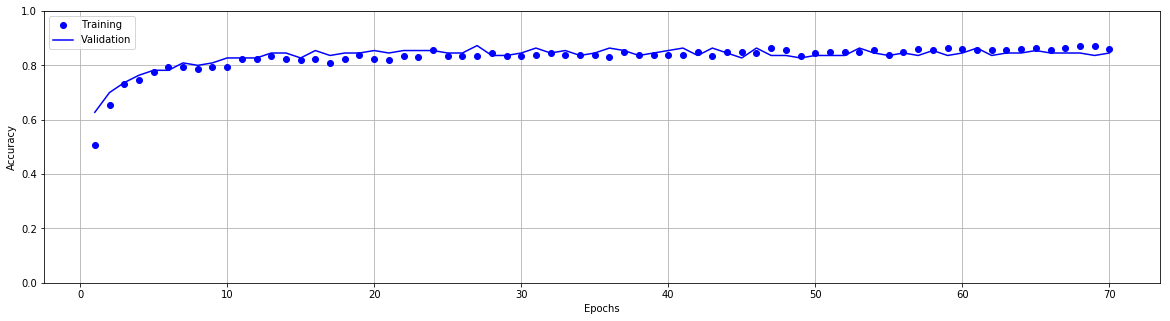

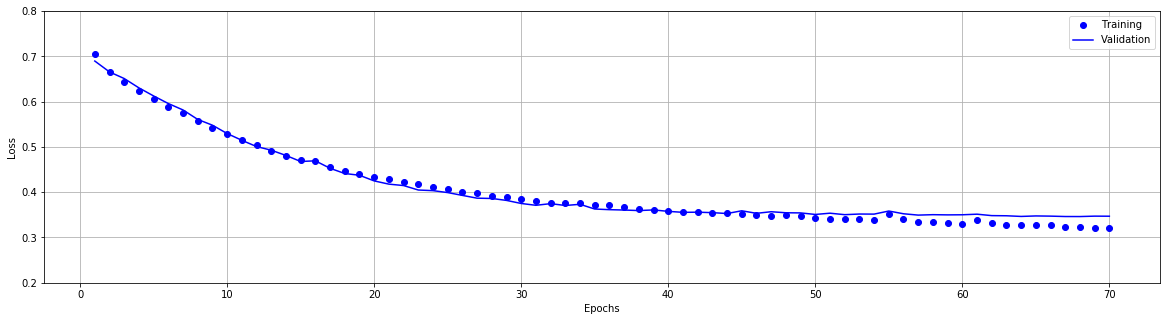

110/110 [==============================] - 0s 18us/step


[0.34698668122291565, 0.84545457363128662]

In [151]:
# plot the results

epochs = range(1, N + 1)
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# accuracy plot

plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot

plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0.2, 0.8])
plt.grid()
plt.legend()
plt.show()

score = model.evaluate(x_test, y_test, batch_size = 128)
score

Under here we try to use the traincde network in a practical setting and generate the likelihood of a person actually having a heart disease by using the predict method.

In [146]:
# generate the likelyhood of reviews being positive

model.predict(x_test)

array([[ 0.24758857],
       [ 0.87931401],
       [ 0.98295367],
       [ 0.99485564],
       [ 0.27953476],
       [ 0.09898409],
       [ 0.38532177],
       [ 0.71455973],
       [ 0.99017769],
       [ 0.9611463 ],
       [ 0.06614269],
       [ 0.95210534],
       [ 0.1506629 ],
       [ 0.61317933],
       [ 0.31484497],
       [ 0.04528483],
       [ 0.0576498 ],
       [ 0.86659318],
       [ 0.95277125],
       [ 0.47851408],
       [ 0.02601009],
       [ 0.44230911],
       [ 0.06751491],
       [ 0.06539154],
       [ 0.97928542],
       [ 0.07593402],
       [ 0.37455183],
       [ 0.94073379],
       [ 0.99432606],
       [ 0.26053259],
       [ 0.11385487],
       [ 0.17496866],
       [ 0.18155809],
       [ 0.0398792 ],
       [ 0.36729589],
       [ 0.0688078 ],
       [ 0.08653677],
       [ 0.99078417],
       [ 0.51564413],
       [ 0.97482002],
       [ 0.28163224],
       [ 0.97567153],
       [ 0.67828572],
       [ 0.4810423 ],
       [ 0.55894375],
       [ 0

As you can see the training accuracy incereases with every epoch and the training loss decreases with every epoch. From the plots it is possible to see that around the 40th epoch the model is trained to it's maximum and the values are not changing tha much anymora so it is probably best to stop training after 40 epochs. The validation loss and accuracy do not seem to peak at any point compared to the training loss and accuracy so this is not the caes of overfitting the model. If it was though, the best way to prevent that would be to stp training after the number of epochs where the validation loss and accuracy start to peak.

<h2> 7. Results and discussion </h2>

Now we train a new network from scratch fo 40 epochs and evaluate it on the test data.

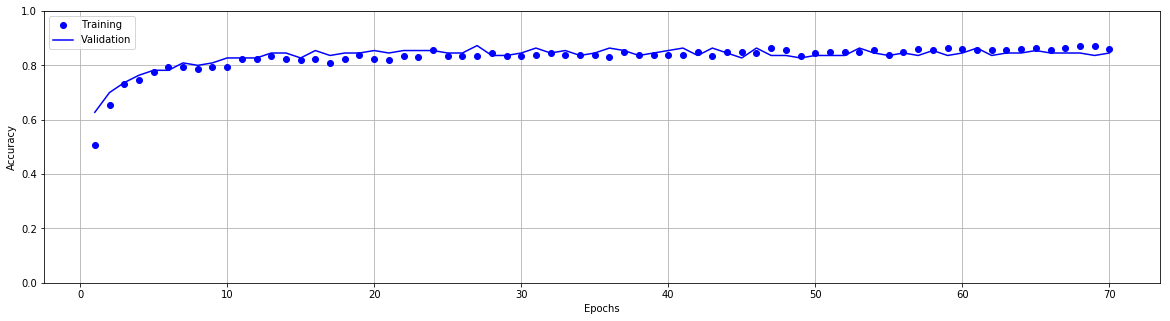

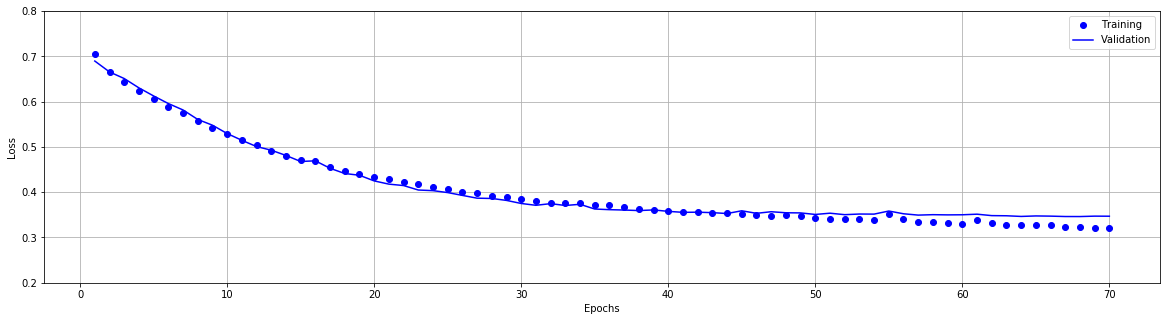

110/110 [==============================] - 0s 9us/step


[0.34698668122291565, 0.84545457363128662]

In [150]:
model = []
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_dim = 13)) 
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

N = 70
h = model.fit(x_train, y_train,
              epochs = N,
              verbose = 0,
              batch_size = 128,
              validation_data=(x_test, y_test))

# plot the results

epochs = range(1, N + 1)
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# accuracy plot

plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot

plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label='Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0.2, 0.8])
plt.grid()
plt.legend()
plt.show()

score = model.evaluate(x_test, y_test, batch_size = 128)
score


By cutting the number of epochs from 100 to 40, the accuracy did not change so I think it's safe to say that 40 epochs is enough for this model. The accuracy would be better if it were over 95% so this is not probably the best model.

<h2> 8. Conclusions </h2>

This assignment was interesting and well thought but still difficult. I left the using of the unprocessed data out because I faced some difficulties with it and attacking those problems were too time consuming for me to finish the assignment in time. I'm not sure if I understood everything correctly but tried my best. 